In [65]:
%matplotlib inline

In [66]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from pathlib import Path
import sklearn.datasets as dta
import scipy.stats as st

In [68]:
# Load csv file Resources/homelesess_2012_2022.xlsx
file_path = Path('../Resources/merge_file.csv')
# Read the csv file
combined_df = pd.read_csv(file_path)
# Display data
combined_df.head()

,State,2022_homelesess,2021_homelesess,2020_homelesess,2019_homelesess,2018_homelesess,2017_homelesess,2016_homelesess,2015_homelesess,2014_homelesess,...,2013_rental,2014_rental,2015_rental,2016_rental,2017_rental,2018_rental,2019_rental,2020_rental,2021_rental,2022_rental
0,AK,2320,1949,1949,1907,2016,1845,1940.0,1956.0,1784.0,...,1909.0,1957.0,1940.0,1903.0,1900.0,1967.0,2016.0,1990.0,2340.0,2420.0
1,AL,3752,2556,3351,3261,3434,3793,4111.0,3970.0,4561.0,...,1022.0,1103.0,958.0,1016.0,1007.0,1042.0,1068.0,1054.0,1240.0,1282.0
2,AR,2459,2139,2366,2717,2712,2467,2463.0,2560.0,2936.0,...,953.0,1075.0,1045.0,1081.0,1083.0,1121.0,1149.0,1134.0,1334.0,1379.0
3,AZ,13553,5460,10979,10007,9865,8947,9707.0,9896.0,10495.0,...,1210.0,1222.0,1227.0,1260.0,1263.0,1307.0,1340.0,1323.0,1556.0,1609.0
4,CA,171521,57468,161548,151278,129972,131532,118142.0,115738.0,113952.0,...,2132.0,2237.0,2345.0,2465.0,2469.0,2555.0,2619.0,2585.0,3040.0,3143.0


In [69]:
#Changing the type for all columns exept State
# Specify the column to keep as object
object_column = 'State'

# Convert all values to float except the specified object column
combined_df_clean = combined_df.replace(',','', regex = True)
combined_df_clean.loc[:, combined_df_clean.columns != object_column] = combined_df_clean.loc[:, 
                       combined_df_clean.columns != object_column].apply(pd.to_numeric, errors='coerce')

#combined_df_clean = combined_df_clean.apply(pd.to_numeric, errors='coerce').astype('Int64')
combined_df_clean.head()

,State,2022_homelesess,2021_homelesess,2020_homelesess,2019_homelesess,2018_homelesess,2017_homelesess,2016_homelesess,2015_homelesess,2014_homelesess,...,2013_rental,2014_rental,2015_rental,2016_rental,2017_rental,2018_rental,2019_rental,2020_rental,2021_rental,2022_rental
0,AK,2320,1949,1949,1907,2016,1845,1940.0,1956.0,1784.0,...,1909.0,1957.0,1940.0,1903.0,1900.0,1967.0,2016.0,1990.0,2340.0,2420.0
1,AL,3752,2556,3351,3261,3434,3793,4111.0,3970.0,4561.0,...,1022.0,1103.0,958.0,1016.0,1007.0,1042.0,1068.0,1054.0,1240.0,1282.0
2,AR,2459,2139,2366,2717,2712,2467,2463.0,2560.0,2936.0,...,953.0,1075.0,1045.0,1081.0,1083.0,1121.0,1149.0,1134.0,1334.0,1379.0
3,AZ,13553,5460,10979,10007,9865,8947,9707.0,9896.0,10495.0,...,1210.0,1222.0,1227.0,1260.0,1263.0,1307.0,1340.0,1323.0,1556.0,1609.0
4,CA,171521,57468,161548,151278,129972,131532,118142.0,115738.0,113952.0,...,2132.0,2237.0,2345.0,2465.0,2469.0,2555.0,2619.0,2585.0,3040.0,3143.0


In [70]:
columns_homelesess = ['2022_homelesess', '2021_homelesess', '2020_homelesess',
       '2019_homelesess', '2018_homelesess', '2017_homelesess',
       '2016_homelesess', '2015_homelesess', '2014_homelesess',
       '2013_homelesess', '2012_homelesess']

columns_rental = ['2012_rental','2013_rental',
       '2014_rental', '2015_rental', '2016_rental', '2017_rental',
       '2018_rental', '2019_rental', '2020_rental', '2021_rental',
       '2022_rental']

In [63]:
# Calculate the total number for homelesess in each year
homelesess_total = combined_df_clean[columns_homelesess].sum()#.iloc[::-1]

# Convert the result to a NumPy array
total_array_homelesess = np.array(homelesess_total)
print(total_array_homelesess)

[571138. 374482. 568575. 555457. 540742. 538656. 537033. 551293. 562475.
 574949. 604506.]


In [61]:
# Calculate the average for rental columns
rental_averages = combined_df_clean[columns_rental].mean()

# Convert the result to a NumPy array
averages_array_rental = np.array(rental_averages)
averages_array_rental = averages_array_rental
print(averages_array_rental)

[1361.30612245 1417.46938776 1459.89795918 1506.51020408 1530.32653061
 1527.91836735 1581.3877551  1620.93877551 1599.89795918 1881.42857143
 1945.3877551 ]


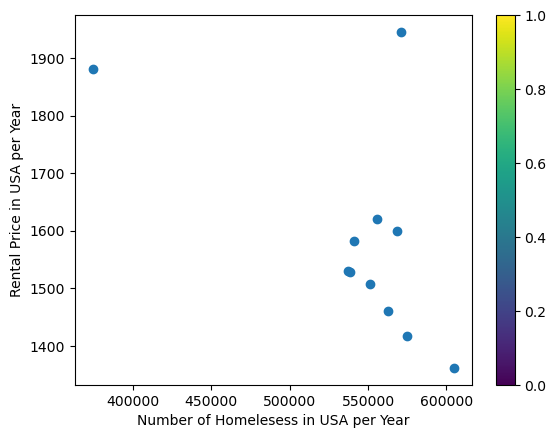

In [62]:
plt.scatter(total_array_homelesess,averages_array_rental)
clb = plt.colorbar()
plt.xlabel("Number of Homelesess in USA per Year")
plt.ylabel("Rental Price in USA per Year")
plt.show()

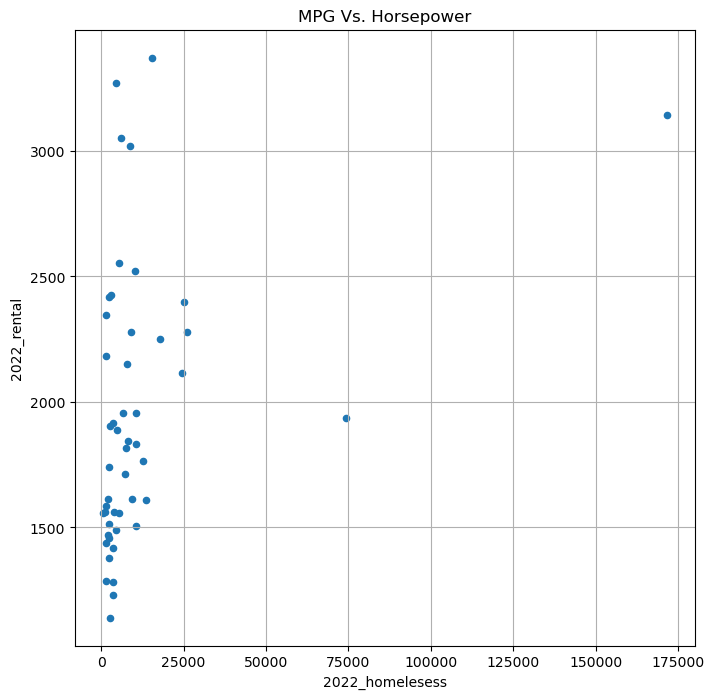

In [57]:
combined_df_clean.plot(kind="scatter", x="2022_homelesess", y="2022_rental", grid=True, figsize=(8,8),
              title="MPG Vs. Horsepower")
plt.show()